<a href="https://colab.research.google.com/github/Kayla-afk/Tugas-Kuliah-D4-Sains-Data-Terapan/blob/main/3324600023_Kayla_Nuansa_Ceria_MLOps_Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. california_dataset.csv

In [2]:
#a. splitting data
import pandas as pd

path = '/content/california_dataset.csv'
df = pd.read_csv(path)

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,house_price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'house_price'],
      dtype='object')

In [5]:
from sklearn.model_selection import train_test_split

X = df.drop('house_price', axis=1)
y = df['house_price']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

print("Shape X_train:", X_train.shape)
print("Shape X_test :", X_test.shape)

Shape X_train: (16512, 8)
Shape X_test : (4128, 8)


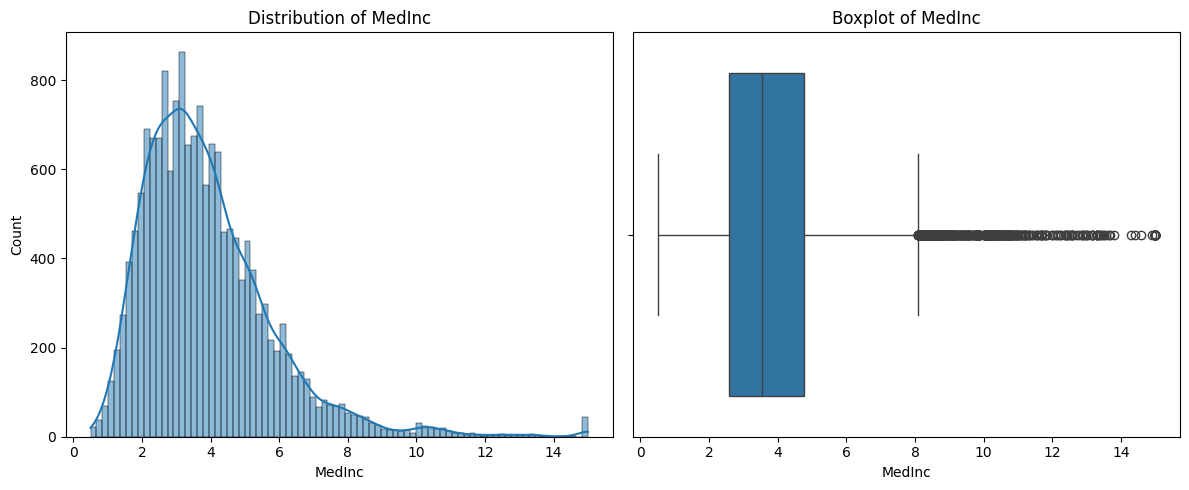

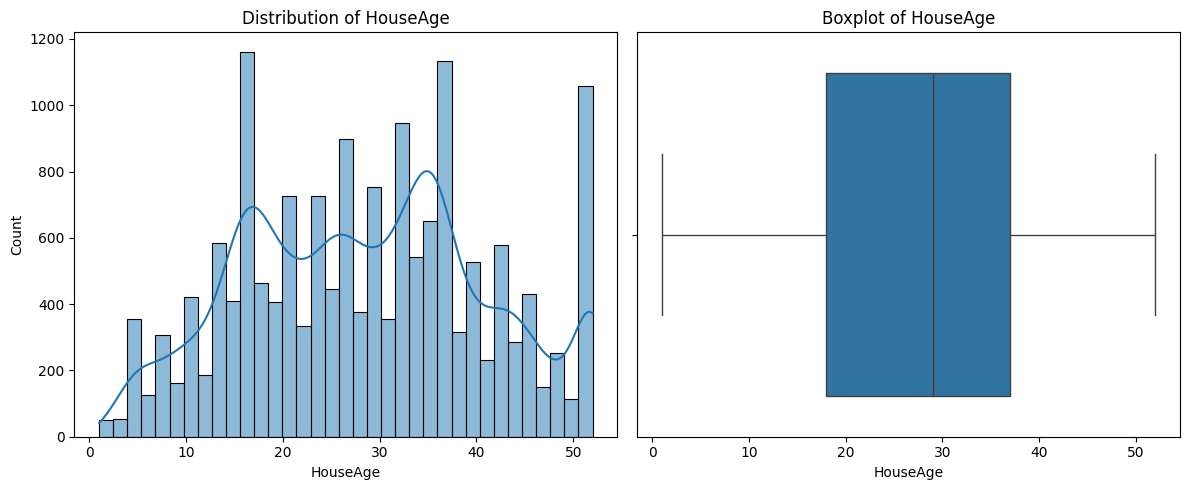

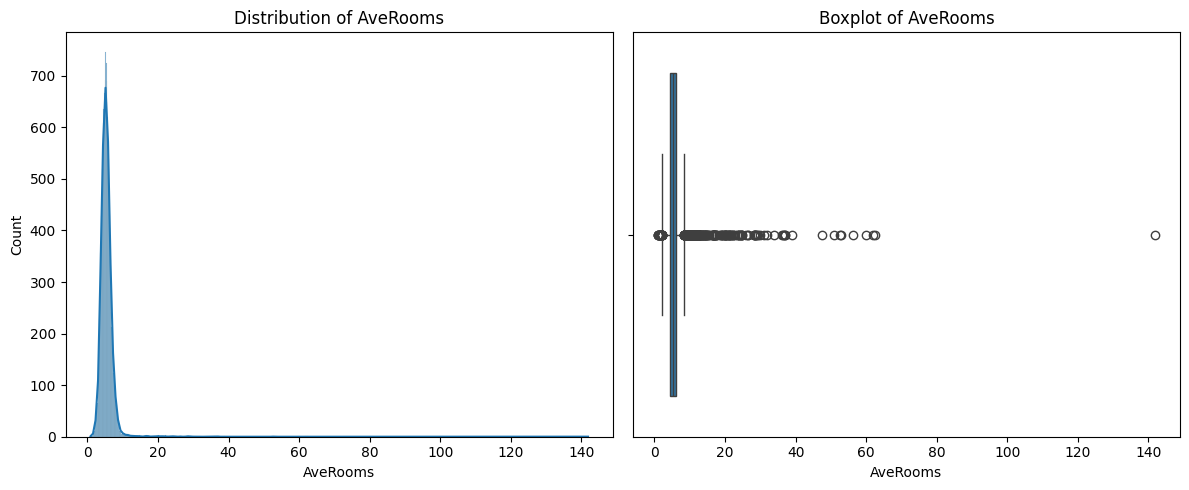

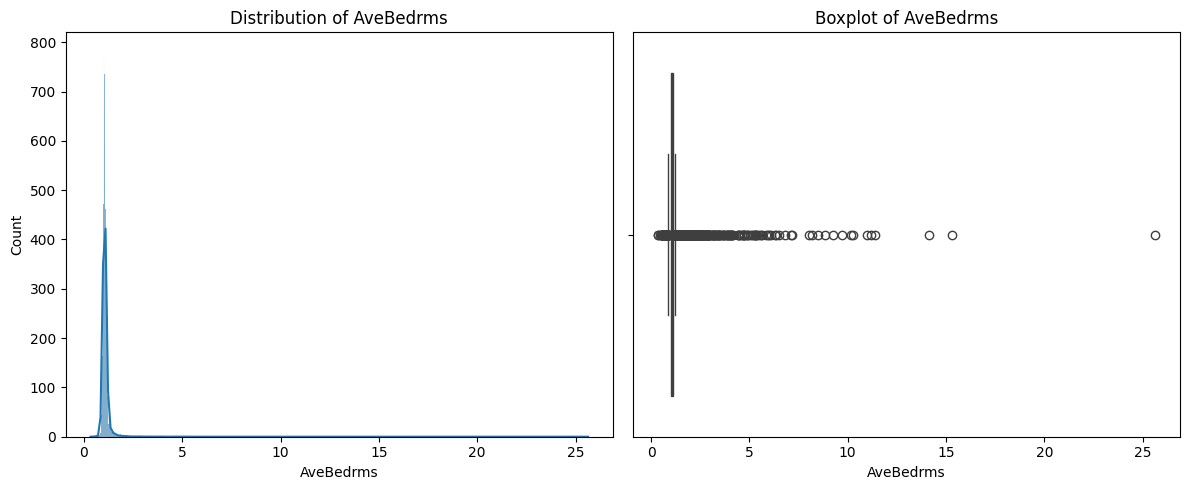

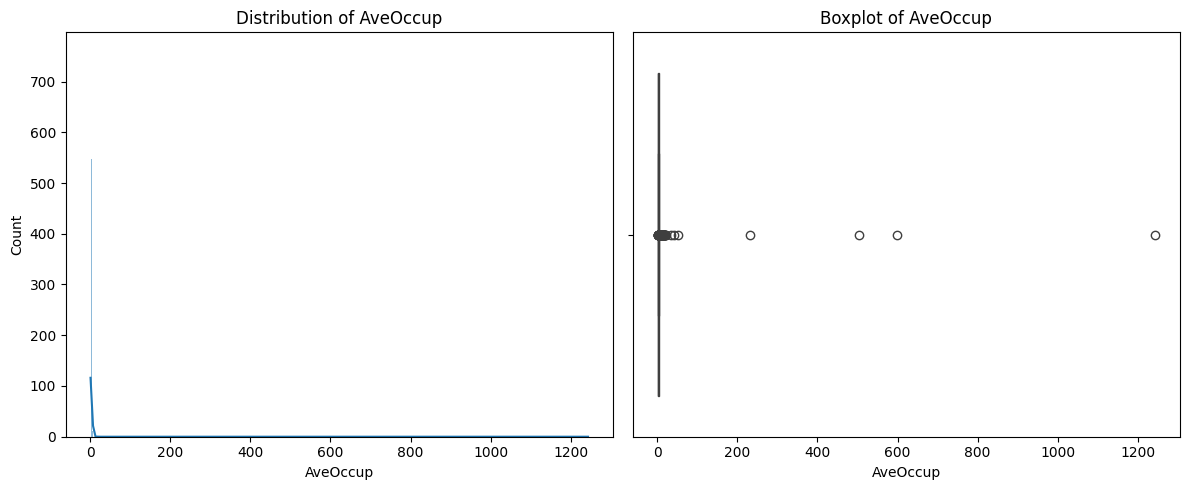

In [6]:
#b. Looping untuk melihat plot distribusi data dan outlier pada kolom-kolom:['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'AveOccup']
import matplotlib.pyplot as plt
import seaborn as sns

cols = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'AveOccup']

for col in cols:
    plt.figure(figsize=(12,5))

    # Histogram
    plt.subplot(1,2,1)
    sns.histplot(X_train[col], kde=True)
    plt.title(f'Distribution of {col}')

    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=X_train[col])
    plt.title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()

In [ ]:
#c. Analisa
'''
Berdasarkan visualisasi histogram dan boxplot pada lima variabel numerik, ditemukan bahwa variabel AveRooms, AveBedrms, AveOccup, dan MedInc menunjukkan distribusi right-skewed dengan keberadaan outlier signifikan pada kuartil atas.
Sementara itu, HouseAge relatif lebih stabil dan tidak menunjukkan outlier ekstrem.
Keberadaan outlier berpotensi:
- Mengganggu estimasi parameter pada model regresi
- Meningkatkan variansi model
- Menyebabkan model kurang robust
Oleh karena itu, diperlukan penanganan outlier menggunakan metode Interquartile Range (IQR) pada kolom yang terdeteksi memiliki nilai ekstrem.
'''

In [7]:
#d. Handling outlier menggunakan IQR untuk kolom yang terdeteksi memiliki outlier dan tampilkan hasil plot yang sudah di handling
def handle_outlier_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    data[column] = data[column].clip(lower_bound, upper_bound)

    return data

In [8]:
cols_outlier = ['MedInc', 'AveRooms', 'AveBedrms', 'AveOccup']

for col in cols_outlier:
    X_train = handle_outlier_iqr(X_train, col)

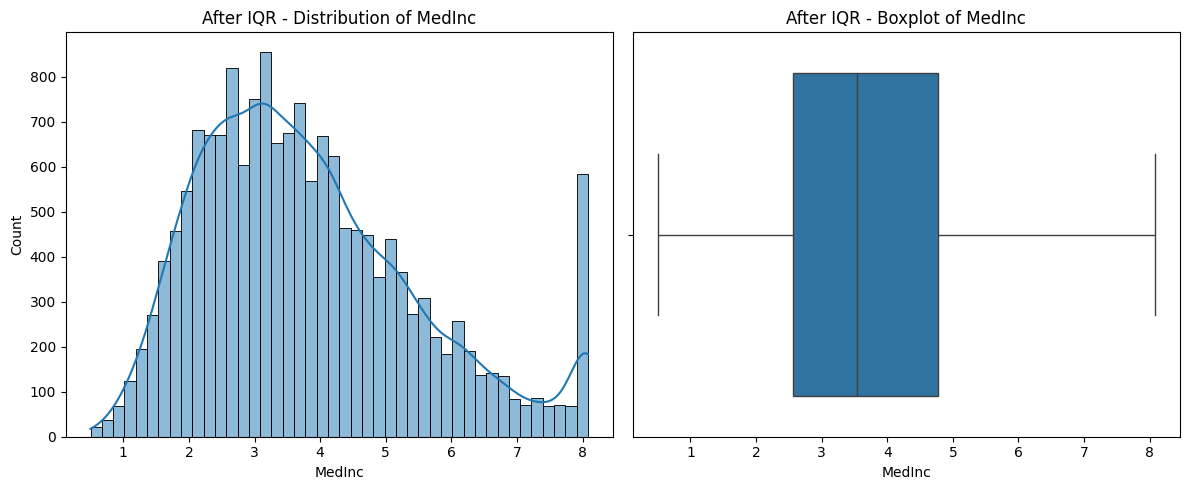

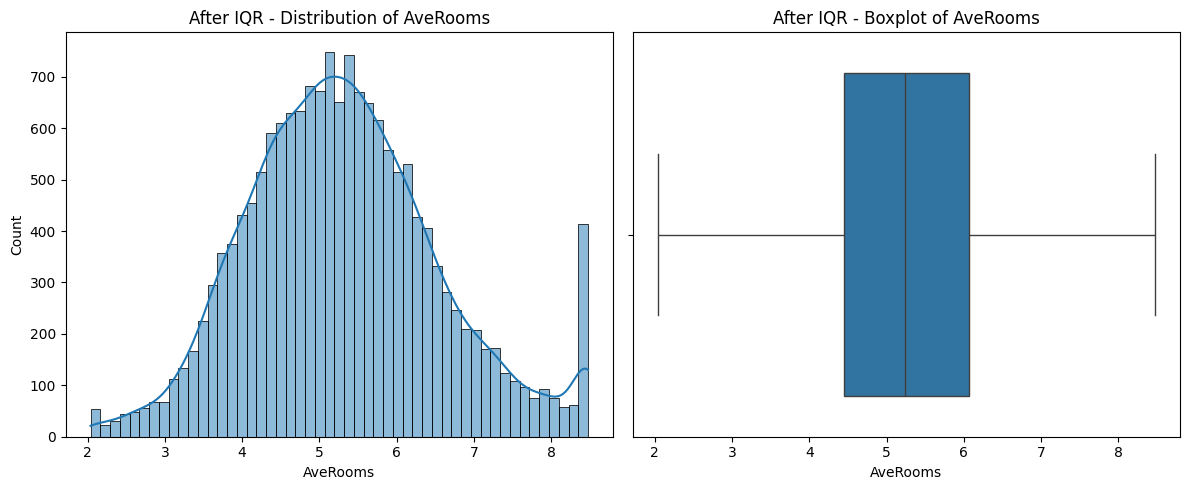

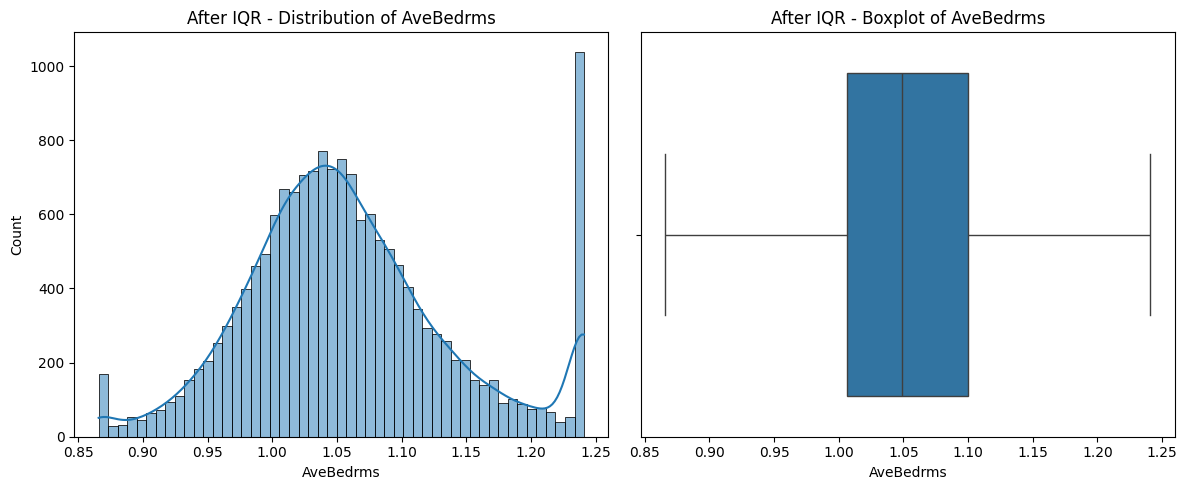

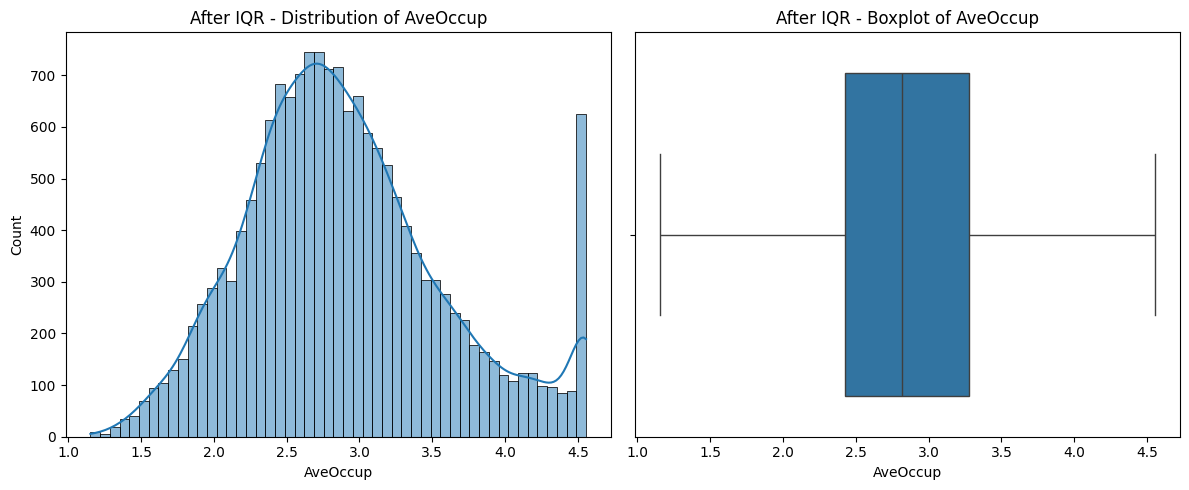

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in cols_outlier:
    plt.figure(figsize=(12,5))

    # Histogram
    plt.subplot(1,2,1)
    sns.histplot(X_train[col], kde=True)
    plt.title(f'After IQR - Distribution of {col}')

    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=X_train[col])
    plt.title(f'After IQR - Boxplot of {col}')

    plt.tight_layout()
    plt.show()

#2. company_csv

In [10]:
#a. Splitting data
import pandas as pd

path = '/content/company.csv'
df_company = pd.read_csv(path)

df_company.head()

,Revenue,Size,Rating,Headquarters
0,Unknown / Non-Applicable,1001 to 5000 employees,3.1,"New York, NY"
1,$1 to $2 billion (USD),5001 to 10000 employees,4.2,"Herndon, VA"
2,$100 to $500 million (USD),1001 to 5000 employees,3.8,"Boston, MA"
3,$100 to $500 million (USD),501 to 1000 employees,3.5,"Bad Ragaz, Switzerland"
4,Unknown / Non-Applicable,51 to 200 employees,2.9,"New York, NY"


In [11]:
df_company.info()
df_company.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Revenue       672 non-null    object 
 1   Size          672 non-null    object 
 2   Rating        672 non-null    float64
 3   Headquarters  672 non-null    object 
dtypes: float64(1), object(3)
memory usage: 21.1+ KB


Index(['Revenue', 'Size', 'Rating', 'Headquarters'], dtype='object')

In [12]:
df_company.columns = df_company.columns.str.strip()

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(
    df_company,
    test_size=0.2,
    random_state=42
)

In [15]:
#b. Cek persentase missing value kolom Headquarters
X_train.columns

Index(['Revenue', 'Size', 'Rating', 'Headquarters'], dtype='object')

In [16]:
missing_count = X_train['Headquarters'].isnull().sum()
total_data = len(X_train)

print("Jumlah Missing Value :", missing_count)

Jumlah Missing Value : 0


In [17]:
missing_percentage = (missing_count / total_data) * 100

print("Persentase Missing   :", round(missing_percentage, 2), "%")

Persentase Missing   : 0.0 %


In [19]:
print("Jumlah Missing Value:", int(missing_count))

Jumlah Missing Value: 0


In [20]:
#c. Handling Missing Value kolom Headquaters
X_train['Headquarters'].isnull().any()

'''
Berdasarkan hasil pemeriksaan pada tahap sebelumnya, kolom Headquarters tidak memiliki missing value (0%).
Oleh karena itu, tidak dilakukan proses imputasi maupun penghapusan data pada kolom tersebut.
Dataset dinyatakan dalam kondisi lengkap untuk variabel ini sehingga dapat langsung digunakan pada tahap preprocessing berikutnya.
'''

np.False_

In [ ]:
#d. Analisa
'''
Proses preprocessing diawali dengan pembagian dataset untuk menghindari data leakage dan memastikan evaluasi yang valid.
Selanjutnya dilakukan pemeriksaan missing value pada kolom Headquarters dan ditemukan bahwa tidak terdapat nilai kosong (0%).
Oleh karena itu, tidak diperlukan proses imputasi maupun penghapusan data pada kolom tersebut.

Langkah-langkah ini menunjukkan bahwa preprocessing dilakukan sesuai dengan prinsip machine learning yang baik.
'''

#3. Telco-Customer-Churn.csv

In [5]:
#a. label encoder pada 'Partner', 'Dependents'
import pandas as pd

df_telco = pd.read_csv('/content/Telco-Customer-Churn.csv')
df_telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df_telco['Partner'].unique()
df_telco['Dependents'].unique()

array(['No', 'Yes'], dtype=object)

In [7]:
df_telco['Partner'] = df_telco['Partner'].map({'Yes':1, 'No':0})
df_telco['Dependents'] = df_telco['Dependents'].map({'Yes':1, 'No':0})

In [8]:
df_telco[['Partner','Dependents']].head()
df_telco[['Partner','Dependents']].value_counts()

Partner  Dependents
0        0             3280
1        1             1749
         0             1653
0        1              361
Name: count, dtype: int64

In [9]:
#b. Pilih kolom-kolom StreamingMovies, StreamingTV, TechSupport, DeviceProtection, OnlineBackup, OnlineSecurity, MultipleLines
selected_cols = [
    'StreamingMovies',
    'StreamingTV',
    'TechSupport',
    'DeviceProtection',
    'OnlineBackup',
    'OnlineSecurity',
    'MultipleLines'
]

df_telco[selected_cols].head()

,StreamingMovies,StreamingTV,TechSupport,DeviceProtection,OnlineBackup,OnlineSecurity,MultipleLines
0,No,No,No,No,Yes,No,No phone service
1,No,No,No,Yes,No,Yes,No
2,No,No,No,No,Yes,Yes,No
3,No,No,Yes,Yes,No,Yes,No phone service
4,No,No,No,No,No,No,No


In [10]:
df_services = df_telco[selected_cols].copy()
df_services.head()

,StreamingMovies,StreamingTV,TechSupport,DeviceProtection,OnlineBackup,OnlineSecurity,MultipleLines
0,No,No,No,No,Yes,No,No phone service
1,No,No,No,Yes,No,Yes,No
2,No,No,No,No,Yes,Yes,No
3,No,No,Yes,Yes,No,Yes,No phone service
4,No,No,No,No,No,No,No


In [11]:
#c. Ganti nilai yang tidak sesuai
for col in selected_cols:
    print(f"\nValue counts sebelum cleaning - {col}")
    print(df_telco[col].value_counts())


Value counts sebelum cleaning - StreamingMovies
StreamingMovies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64

Value counts sebelum cleaning - StreamingTV
StreamingTV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64

Value counts sebelum cleaning - TechSupport
TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64

Value counts sebelum cleaning - DeviceProtection
DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64

Value counts sebelum cleaning - OnlineBackup
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64

Value counts sebelum cleaning - OnlineSecurity
OnlineSecurity
No                     3498
Yes                    2019
No internet service    152

In [12]:
df_telco[selected_cols] = df_telco[selected_cols].replace(
    'No internet service',
    'No'
)

In [13]:
for col in selected_cols:
    print(f"\nValue counts setelah cleaning - {col}")
    print(df_telco[col].value_counts())


Value counts setelah cleaning - StreamingMovies
StreamingMovies
No     4311
Yes    2732
Name: count, dtype: int64

Value counts setelah cleaning - StreamingTV
StreamingTV
No     4336
Yes    2707
Name: count, dtype: int64

Value counts setelah cleaning - TechSupport
TechSupport
No     4999
Yes    2044
Name: count, dtype: int64

Value counts setelah cleaning - DeviceProtection
DeviceProtection
No     4621
Yes    2422
Name: count, dtype: int64

Value counts setelah cleaning - OnlineBackup
OnlineBackup
No     4614
Yes    2429
Name: count, dtype: int64

Value counts setelah cleaning - OnlineSecurity
OnlineSecurity
No     5024
Yes    2019
Name: count, dtype: int64

Value counts setelah cleaning - MultipleLines
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64


In [14]:
#d. label Encoder
for col in selected_cols:
    print(df_telco[col].unique())

['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['Yes' 'No']
['No' 'Yes']
['No phone service' 'No' 'Yes']


In [15]:
for col in selected_cols:
    df_telco[col] = df_telco[col].map({'Yes':1, 'No':0})

In [16]:
df_telco[selected_cols].head()

,StreamingMovies,StreamingTV,TechSupport,DeviceProtection,OnlineBackup,OnlineSecurity,MultipleLines
0,0,0,0,0,1,0,NaN
1,0,0,0,1,0,1,0.0
2,0,0,0,0,1,1,0.0
3,0,0,1,1,0,1,NaN
4,0,0,0,0,0,0,0.0


In [17]:
for col in selected_cols:
    print(f"\nValue counts setelah encoding - {col}")
    print(df_telco[col].value_counts())


Value counts setelah encoding - StreamingMovies
StreamingMovies
0    4311
1    2732
Name: count, dtype: int64

Value counts setelah encoding - StreamingTV
StreamingTV
0    4336
1    2707
Name: count, dtype: int64

Value counts setelah encoding - TechSupport
TechSupport
0    4999
1    2044
Name: count, dtype: int64

Value counts setelah encoding - DeviceProtection
DeviceProtection
0    4621
1    2422
Name: count, dtype: int64

Value counts setelah encoding - OnlineBackup
OnlineBackup
0    4614
1    2429
Name: count, dtype: int64

Value counts setelah encoding - OnlineSecurity
OnlineSecurity
0    5024
1    2019
Name: count, dtype: int64

Value counts setelah encoding - MultipleLines
MultipleLines
0.0    3390
1.0    2971
Name: count, dtype: int64


In [18]:
#e. Mean Encoding pada InternetService
df_telco.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [19]:
df_telco['Churn'] = df_telco['Churn'].map({'Yes':1, 'No':0})

In [20]:
df_telco['InternetService'].value_counts()

,count
InternetService,
Fiber optic,3096
DSL,2421
No,1526


In [21]:
mean_encoding = df_telco.groupby('InternetService')['Churn'].mean()
print(mean_encoding)

InternetService
DSL            0.189591
Fiber optic    0.418928
No             0.074050
Name: Churn, dtype: float64


In [22]:
df_telco['InternetService_mean_encoded'] = df_telco['InternetService'].map(mean_encoding)

In [23]:
df_telco[['InternetService','InternetService_mean_encoded']].head()

,InternetService,InternetService_mean_encoded
0,DSL,0.189591
1,DSL,0.189591
2,DSL,0.189591
3,DSL,0.189591
4,Fiber optic,0.418928


In [ ]:
#f. Analisa
'''
Proses preprocessing dilakukan secara bertahap dengan mengonversu varuabel biner menggunakan label encoding.
menyeragamkan kategori yang tidak konsisten untuk menghindari noise,
dan mengubah variabel multiclass menggunakan mean encoding untuk menangkap hubungan langsung dengan target churn.
Pendekatan ini dilakukan untuk meningkatkan kesiapan datasetselama proses modeling serta menjaga konsistensi dan interpretabilitas fitur.
'''

# 4. Telco-Customer-Churn.csv kolom TotalCharges

In [24]:
#a. Mengganti nilai yang tidak valid dengan NaN
df_telco['TotalCharges'].dtype

dtype('O')

In [25]:
df_telco['TotalCharges'].value_counts().head()

,count
TotalCharges,
,11
20.2,11
19.75,9
20.05,8
19.9,8


In [26]:
(df_telco['TotalCharges'] == ' ').sum()

np.int64(11)

In [27]:
import numpy as np

df_telco['TotalCharges'] = df_telco['TotalCharges'].replace(' ', np.nan)

In [28]:
df_telco['TotalCharges'] = df_telco['TotalCharges'].str.strip()
df_telco['TotalCharges'] = df_telco['TotalCharges'].replace('', np.nan)

In [29]:
df_telco['TotalCharges'].isnull().sum()

np.int64(11)

In [30]:
#b. Mengubah kolom menjadi tipe float dan juga menggunakan pd.to_numeric serta errors='coerce'
df_telco['TotalCharges'] = pd.to_numeric(
    df_telco['TotalCharges'],
    errors='coerce'
)

In [31]:
df_telco['TotalCharges'].dtype

dtype('float64')

In [32]:
df_telco['TotalCharges'].isnull().sum()

np.int64(11)

In [33]:
#c. Periksa missing value, jika < 20% imputasi dengan teknik yang tepat
missing_count = df_telco['TotalCharges'].isnull().sum()
total_data = len(df_telco)

missing_percentage = (missing_count / total_data) * 100

print("Jumlah Missing :", int(missing_count))
print("Persentase     :", round(missing_percentage, 2), "%")

Jumlah Missing : 11
Persentase     : 0.16 %


In [34]:
#d. Mengisi nilai NaN dengan teknik yang tepat untuk imputasi missing value
median_value = df_telco['TotalCharges'].median()
median_value

1397.475

In [35]:
df_telco['TotalCharges'] = df_telco['TotalCharges'].fillna(median_value)

In [36]:
df_telco['TotalCharges'].isnull().sum()

np.int64(0)

In [37]:
#e. Memeriksa apakah ada nilai NaN yang tersisa
df_telco['TotalCharges'].isnull().sum()

np.int64(0)

In [38]:
df_telco.isnull().sum().sum()

np.int64(682)

In [39]:
df_telco.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,682
InternetService,0
OnlineSecurity,0


In [40]:
df_telco['TotalCharges'].isnull().sum()

np.int64(0)

In [41]:
#f. Lakukan kedua scaller StandardScaller dan MinMaxScaller, tampilkan perbandingan plotnya
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [42]:
total_charges = df_telco[['TotalCharges']]

In [43]:
scaler_std = StandardScaler()
total_std = scaler_std.fit_transform(total_charges)

In [44]:
scaler_minmax = MinMaxScaler()
total_minmax = scaler_minmax.fit_transform(total_charges)

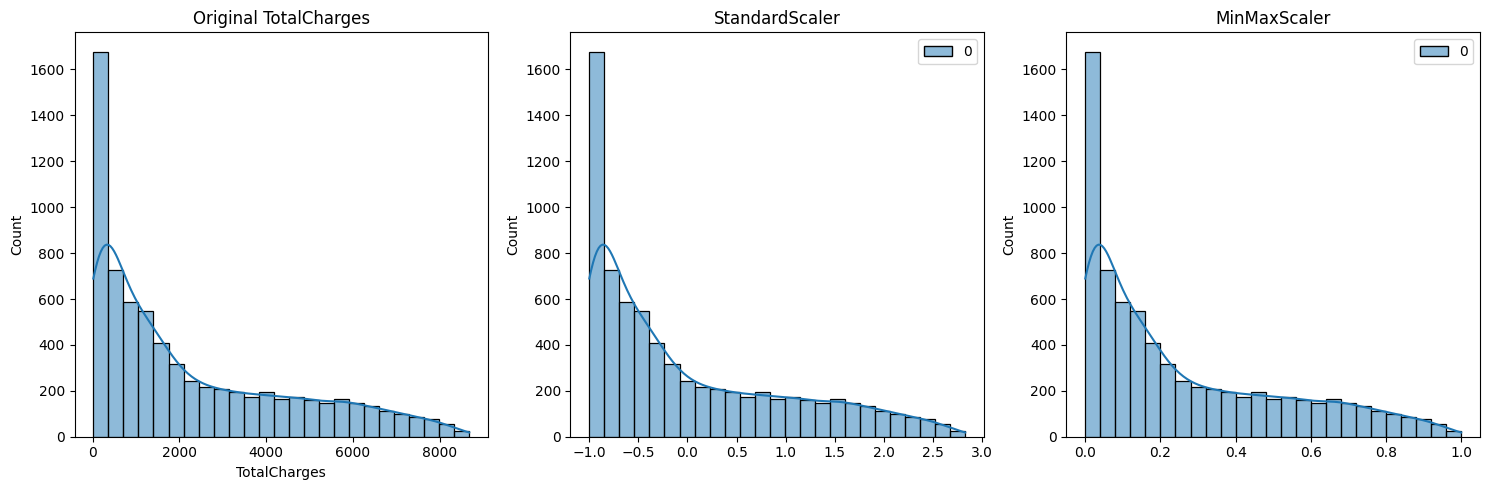

In [45]:
plt.figure(figsize=(15,5))

# Original
plt.subplot(1,3,1)
sns.histplot(df_telco['TotalCharges'], kde=True)
plt.title('Original TotalCharges')

# StandardScaler
plt.subplot(1,3,2)
sns.histplot(total_std, kde=True)
plt.title('StandardScaler')

# MinMaxScaler
plt.subplot(1,3,3)
sns.histplot(total_minmax, kde=True)
plt.title('MinMaxScaler')

plt.tight_layout()
plt.show()

In [ ]:
#g. Analisa
'''
Proses preprocessing pada kolom TotalCharges dilakukan secara bertahap meliputi:
- Pembersihan nilai tidak valid
- Konversi tipe data ke numerik
- Identifikasi missing value
- Pengambilan keputusan berbasis persentase missing
- Imputasi menggunakan teknik yang sesuai
- Scaling untuk persiapan modeling

Pendekatan ini memastikan:
- Data bersih
- Tidak ada missing value
- Skala fitur seragam
- Dataset siap untuk tahap machine learning
'''